<a href="https://colab.research.google.com/github/boriphat12/Student-Success-Factor-Analysis/blob/main/Student_Success_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os

path = kagglehub.dataset_download("anassarfraz13/student-success-factors-and-insights")

# List files in the downloaded directory
files = os.listdir(path)
print("Files in the downloaded directory:", files)

# Assuming the CSV file is named 'StudentPerformanceFactors.csv' based on the previous output
csv_file_path = os.path.join(path, 'StudentPerformanceFactors.csv')

data = pd.read_csv(csv_file_path)
data.head(5)

Using Colab cache for faster access to the 'student-success-factors-and-insights' dataset.
Files in the downloaded directory: ['StudentPerformanceFactors.csv']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [39]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [40]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [41]:
#data.loc[:, ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].tail(20)
data2 = data.dropna()

In [42]:
data2.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


<Axes: >

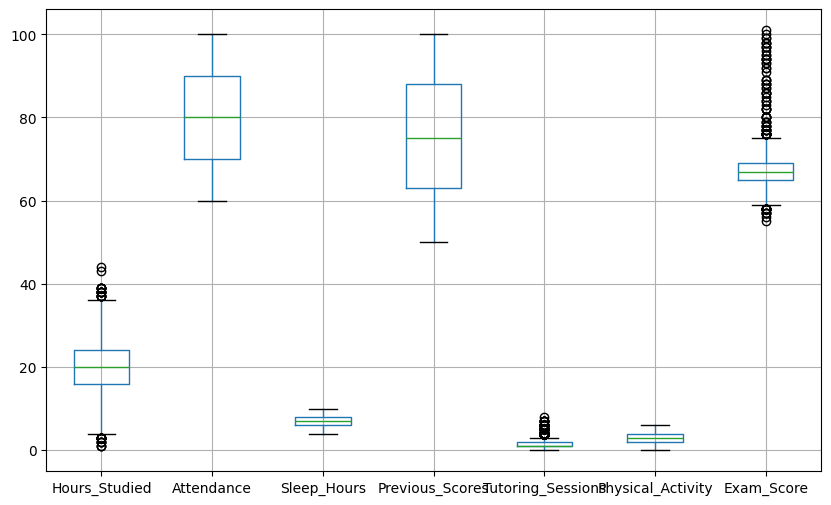

In [43]:
data2.boxplot(figsize=(10, 6))

<Axes: >

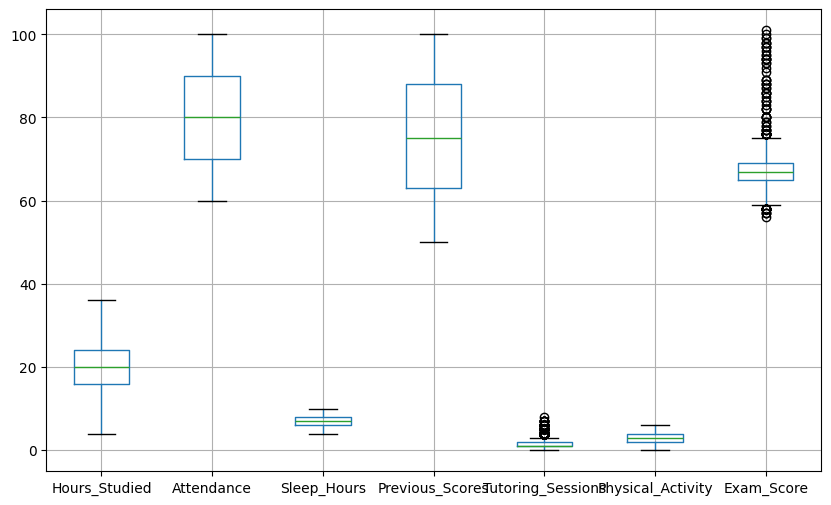

In [44]:
#Clean Hours_Studied
Q1 = data2['Hours_Studied'].quantile(0.25)
Q2 = data2['Hours_Studied'].quantile(0.75)

IQR = Q2 - Q1
lower = Q1 - 1.5*IQR
upper = Q2 + 1.5*IQR

data2 = data2[(data2['Hours_Studied'] >= lower ) & (data2['Hours_Studied'] <= upper)]
data2.boxplot(figsize=(10, 6))

In [45]:
#Clean tutoring session
Q1 = data2['Tutoring_Sessions'].quantile(0.25)
Q2 = data2['Tutoring_Sessions'].quantile(0.75)

IQR = Q2 - Q1
lower = Q1 - 1.5*IQR
upper = Q2 + 1.5*IQR

outlier = data2[(data2['Tutoring_Sessions'] < lower) | (data2['Tutoring_Sessions'] > upper)]
print('outliers size:', outlier.shape)
print('data size:', data2.shape)
print(outlier.shape[0] * 100 / data2.shape[0], "% of outlier")

outliers size: (423, 20)
data size: (6338, 20)
6.674029662354055 % of outlier


<Axes: >

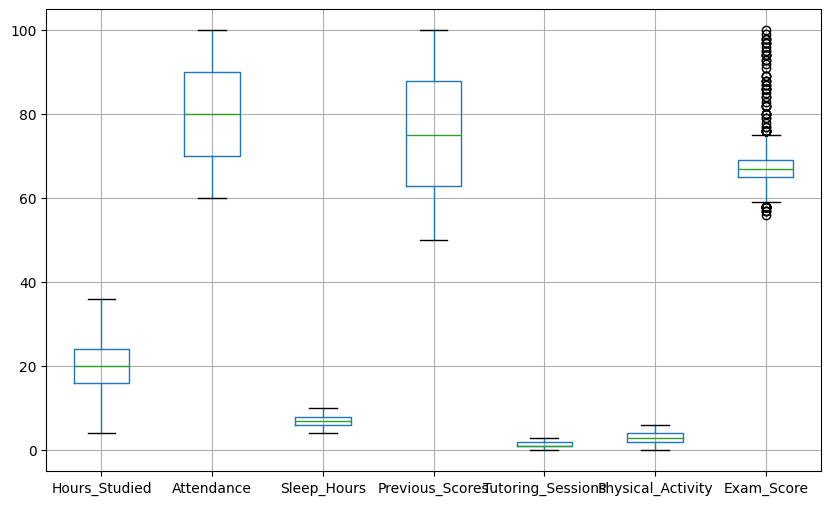

In [46]:
data2 = data2[(data2['Tutoring_Sessions'] >= lower ) & (data2['Tutoring_Sessions'] <= upper)]
data2.boxplot(figsize=(10, 6))

In [47]:
data2.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000
mean,19.991040,79.985461,7.040406,75.080473,1.289265,2.962975,67.144379
std,5.822776,11.534313,1.468722,14.362626,0.982435,1.029074,3.844076
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.000000,6.000000,100.000000


In [48]:
data2.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

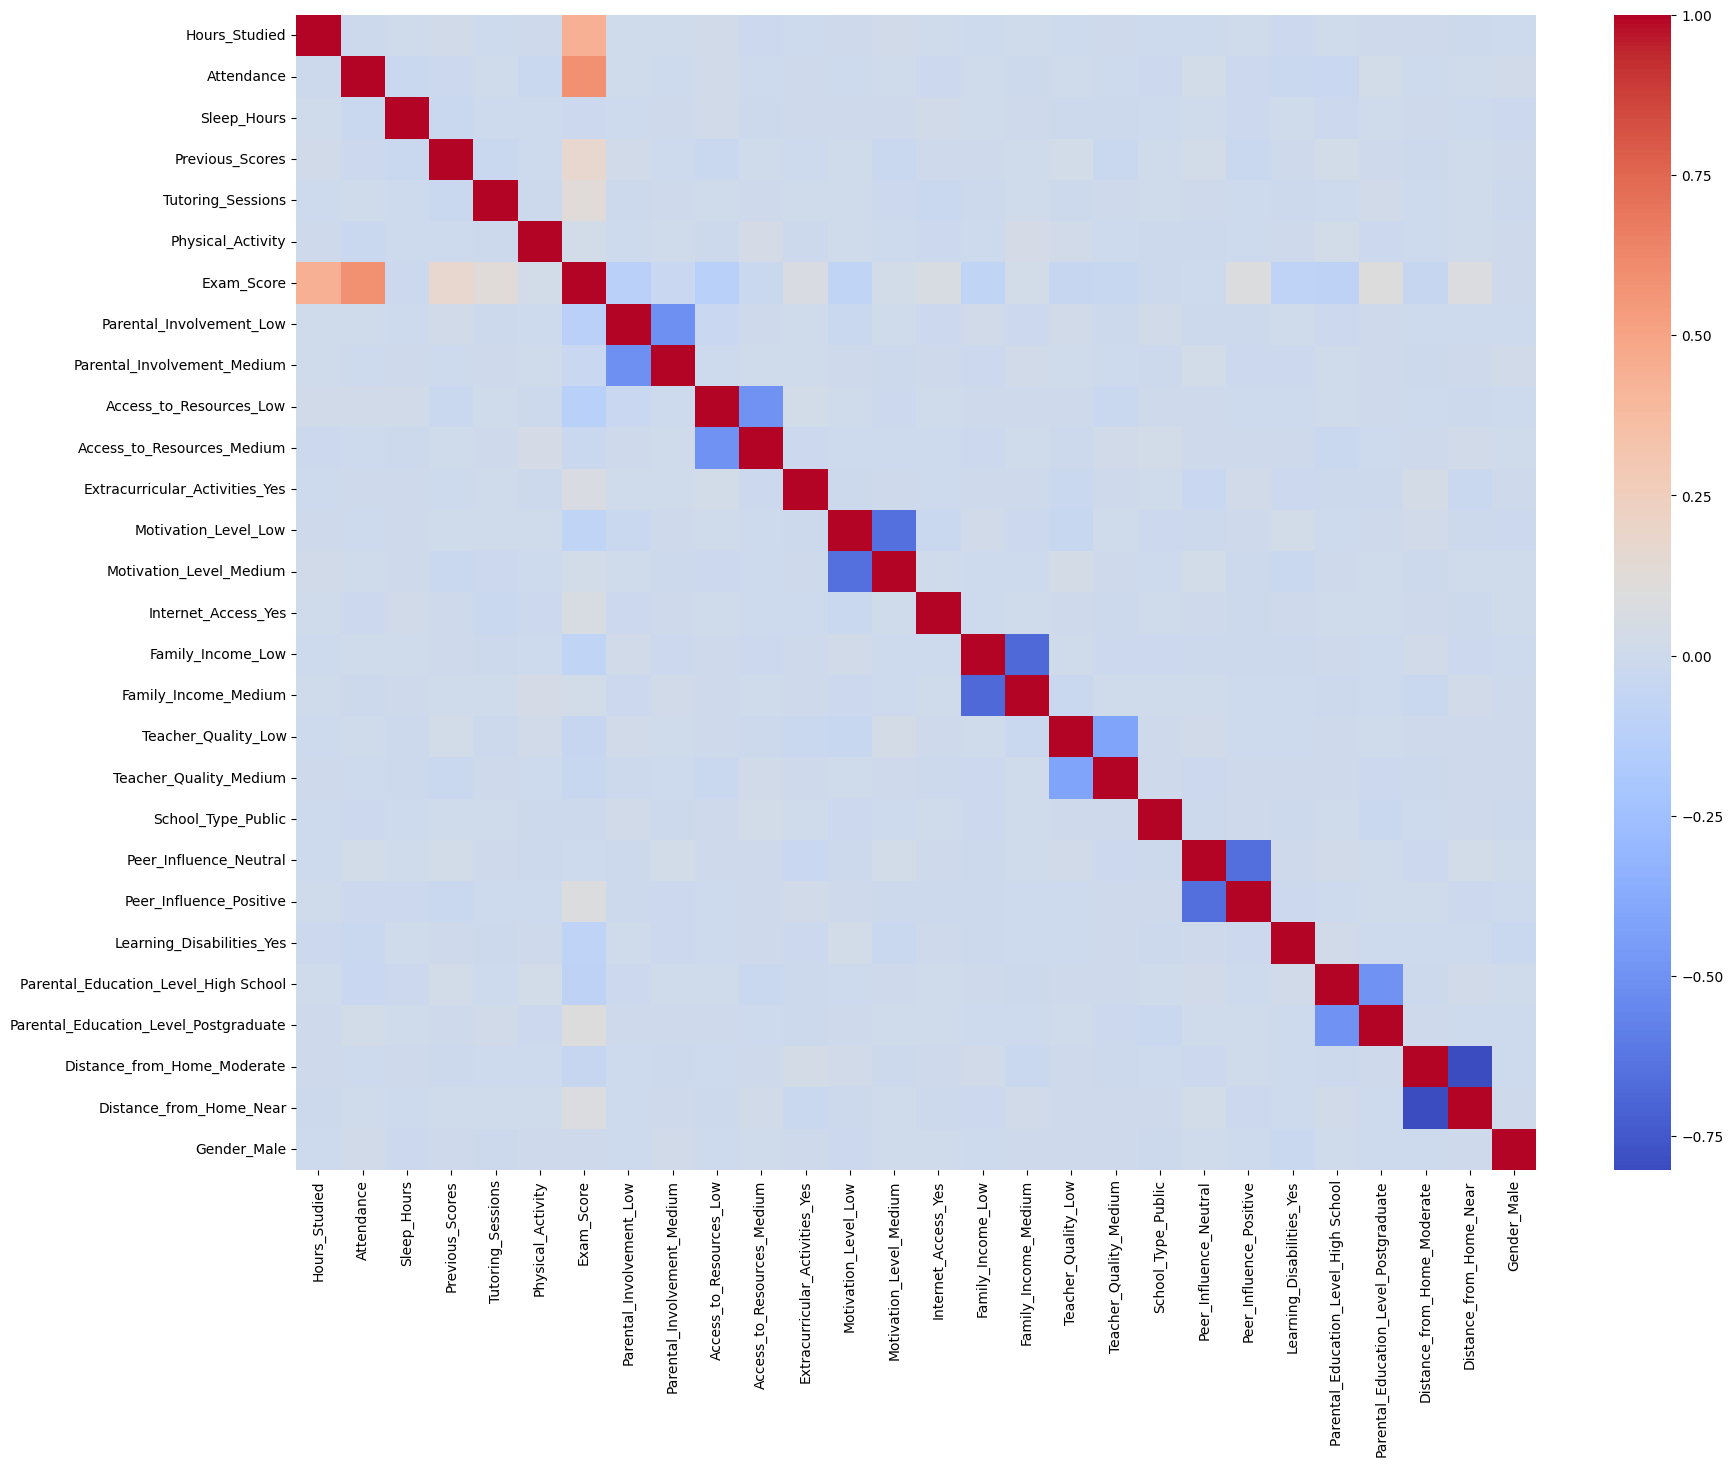

In [54]:
import seaborn as sns
numerical_col = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
caterogical_col = []
for c in data2.columns:
  if c not in numerical_col:
      caterogical_col.append(c)

data_encoded = pd.get_dummies(data2, columns=caterogical_col, drop_first = True)
data_encoded.head(5)

plt.figure(figsize=(20, 15))
sns.heatmap(data_encoded.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.show()

In [61]:
corr_matrix = data_encoded.corr(numeric_only=True)
corr_with_goal =  corr_matrix['Exam_Score']
selected_features = corr_with_goal[abs(corr_with_goal) >= 0.09].index.tolist()
selected_features.remove('Exam_Score')
print(selected_features)

['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Parental_Involvement_Low', 'Access_to_Resources_Low', 'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate']


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = data_encoded[selected_features]
y = data_encoded['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

rfg = RandomForestRegressor(max_depth=50, n_estimators=100)

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R-squred:', r2)
print('MAE:', mae)

R-squred: 0.601383719993805
MAE: 1.288372962202632


In [99]:
#try RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}
rfg = RandomForestRegressor(random_state=50)
random_search = RandomizedSearchCV(rfg, param_distributions=param_dist, n_iter=50, cv=5, scoring='r2', random_state=50)
random_search.fit(X_train, y_train)

print('Best parameters found:', random_search.best_params_)

best_rfg = random_search.best_estimator_
y_pred = best_rfg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squred:', r2)
print('MAE:', mae)


Best parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 20}
R-squred: 0.6330482734695686
MAE: 1.190634598084879
